# Entropy

$
\text{Info}(D) = -\sum_{i=1}^{m} p_i \log_2(p_i)
$
- D:代表某一個特徵,且有m個類別
- p:是某一個類別在這個特徵中出現的機率


資料是各一半時，表示各個類別概率𝑝為0.5。`Entropy = 1`

$Entropy = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1$

當資料是完全同一類時，表示只有一個類別，其概率𝑝為1，其他類別的概率𝑝為0。`Entropy = 0`

$Entropy = -1 \log_2(1) - 0 \log_2(0) = 0$
- $\log_2(1)$ = 0
- 若$a^b=c，則log_a(c)=b$，故b=0
- $\log_2(0)$無意義，數學上處理 $\lim_{p→0} p\log_2(p) =0$

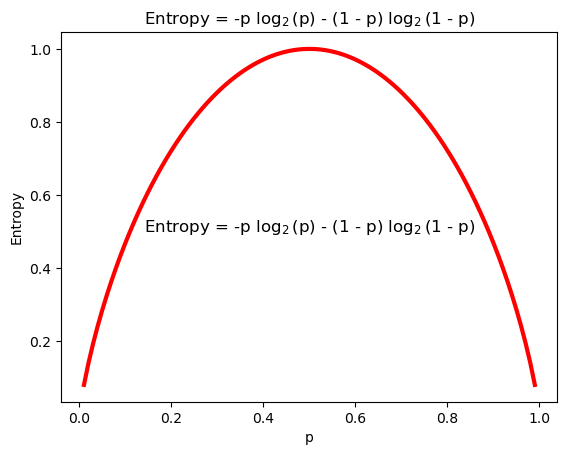

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義熵計算公式
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 定義概率範圍
p = np.linspace(0.01, 0.99, 100)
H = entropy(p)

# 繪製熵圖
plt.plot(p, H, 'r', linewidth=3)
plt.xlabel('p')
plt.ylabel('Entropy')
plt.title(r'Entropy = -p $\log_2$(p) - (1 - p) $\log_2$(1 - p)')
plt.grid(False)

# 顯示熵計算公式和熵值
plt.text(0.5, 0.5, r'Entropy = -p $\log_2$(p) - (1 - p) $\log_2$(1 - p)', fontsize=12, ha='center')

plt.show()

# Information Gain

$$
\text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{S_v}{S} \text{Entropy}(S_v)
$$

# Define Entropy

In [2]:
import numpy as np
from math import log
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 計算二分類情況下的熵
def E(a,b):
    if a == 0 or b ==0:
        return 0
    probs_a = a / (a+b)
    probs_b = b / (a+b)
    # Compute entropy
    ent = -(probs_a * log(probs_a,2) + probs_b * log(probs_b,2))
    return ent

# 計算多分類情況下的熵
def entropy_labels(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    # print(value,counts)
    probs = counts / n_labels

    ent = 0.
    # Compute entropy
    for i in probs:
        ent -= i * log(i,2)

    return ent

# Example: Play Golf - 1 tier

| Outlook  | Temp | Humidity | Windy | Play Golf |
|----------|------|----------|-------|-----------|
| Rain     | Hot  | High     | false | No        |
| Rain     | Hot  | High     | true  | No        |
| overcast | Hot  | High     | false | Yes       |
| Sunny    | Mild | High     | false | Yes       |
| Sunny    | Cool | normal   | false | Yes       |
| Sunny    | Cool | normal   | true  | No        |
| overcast | Cool | normal   | true  | Yes       |
| Rain     | Mild | High     | false | No        |
| Rain     | Cool | normal   | false | Yes       |
| Sunny    | Mild | normal   | false | Yes       |
| Rain     | Mild | normal   | true  | Yes       |
| overcast | Mild | High     | true  | Yes       |
| overcast | Hot  | normal   | false | Yes       |
| Sunny    | Mild | High     | true  | No        |

## Step 1
Calculate entropy of Play Golf (target)

| | Yes | No |
|-|-|-|
| Play Golf | 9 | 5|

In [4]:
# Play Golf Entropy
e_play = E(9,5)
e_play

0.9402859586706309

In [5]:
# Play Golf Entropy
play_labels = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
entropy_labels(play_labels)

0.9402859586706309

## Step 2
The dataset is then split into the different attributes

### Outlook Gain

|          |            | Play Golf |     |
|----------|------------|-----------|-----|
|          |            | Yes       | No  |
| Outlook  | Sunny      | 3         | 2   |
|          | Overcast   | 4         | 0   |
|          | Rainy      | 2         | 3   |

In [6]:
e_play-(5/14*E(3,2)+4/14*E(4,0)+5/14*E(2,3))

0.2467498197744391

### Temp Gain

|       |        | Play Golf |     |
|-------|--------|-----------|-----|
|       |        | Yes       | No  |
| Temp  | Hot    | 2         | 2   |
|       | Mild   | 4         | 2   |
|       | Cool   | 3         | 1   |


In [7]:
e_play-(4/14*E(2,2)+6/14*E(4,2)+4/14*E(3,1))

0.029222565658954647

### Humility Gain

|          |        | Play Golf |     |
|----------|--------|-----------|-----|
|          |        | Yes       | No  |
| Humidity | High   | 3         | 4   |
|          | Normal | 6         | 1   |


In [8]:
e_play-(7/14*E(3,4)+7/14*E(6,1))

0.15183550136234136

### Windy Gain

|        |        | Play Golf |     |
|--------|--------|-----------|-----|
|        |        | Yes       | No  |
| Windy  | False  | 6         | 2   |
|        | True   | 3         | 3   |


In [9]:
e_play-(8/14*E(6,2)+6/14*E(3,3))

0.04812703040826927

## Step 3
pick out attribute with the greatest IG as the decision node

In [10]:
# outlook gain
e_play-(5/14*E(3,2)+4/14*E(4,0)+5/14*E(2,3))

0.2467498197744391

# Example: Play Golf -2 tier

**Outlook = rain 時，獲得最大的信息增益，故 Outlook 為決策樹的第一個節點**

接著計算 Temp, Humidity, Windy 的 Information Gain

| Outlook  | Temp | Humidity | Windy | Play Golf |
|----------|------|----------|-------|-----------|
| Rain     | Hot  | High     | false | No        |
| Rain     | Hot  | High     | true  | No        |
| Rain     | Mild | High     | false | No        |
| Rain     | Cool | normal   | false | Yes       |
| Rain     | Mild | normal   | true  | Yes       |

## Play Golf

In [11]:
# play golf
print(E(3,2))
print('='*20)

labels=['no','no','no', 'yes', 'yes']
print(entropy_labels(labels))

0.9709505944546686
0.9709505944546686


## Temp Gain

|       |        | Play Golf |     |
|-------|--------|-----------|-----|
|       |        | Yes       | No  |
| Temp  | Hot    | 2         | 0   |
|       | Mild   | 1         | 1   |
|       | Cool   | 1         | 0   |

In [12]:
# temp gain
E(3,2) - (2/5*E(2,0)+2/5*E(1,1)+1/5*E(1,0))

0.5709505944546686

## Humility Gain

|          |        | Play Golf |     |
|----------|--------|-----------|-----|
|          |        | Yes       | No  |
| Humidity | High   | 0         | 3   |
|          | Normal | 2         | 0   |

In [13]:
# humility gain
E(3,2) - (3/5*E(0,3)+2/5*E(2,0))

0.9709505944546686

## Windy Gain

|        |        | Play Golf |     |
|--------|--------|-----------|-----|
|        |        | Yes       | No  |
| Windy  | False  | 1         | 2   |
|        | True   | 1         | 1   |

In [14]:
# windy gain
E(3,2) - (3/5*E(1,2)+2/5*E(1,1))

0.01997309402197489

# 繪制決策樹

找到每個節點中最大 Information Gain 的特徵

IG 愈大表示此特徵內資料凌亂程度愈小

```mermaid
graph TD
    A[Outlook] --> B[Sunny]
    A --> C[Overcast]
    A --> D[Rain]
    
    B --> E[Windy]
    E --> F[False]
    E --> G[True]
    
    C --> H[Play=Yes]
    F --> I[Play=Yes]
    G --> J[Play=No]
    
    D --> K[Humidity]
    K --> L[High]
    K --> M[Normal]
    L --> N[Play=No]
    M --> O[Play=Yes]


# 自定義的entropy

ans

['yes'] [3] <br>
0.0<br>
['no' 'yes'] [2 2]<br>
1.0<br>
['high' 'low' 'normal'] [3 2 3]<br>
1.5612781244591325<br>
['high' 'normal'] [5 3]<br>
0.9544340029249649<br>

In [15]:
# 計算多分類情況下的熵
def entropy_labels(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    # print(value,counts)
    probs = counts / n_labels

    ent = 0.
    # Compute entropy
    for i in probs:
        ent -= i * log(i,2)

    return ent


labels=['yes','yes','yes']
print(entropy_labels(labels))

labels=['yes','no','yes','no']
print(entropy_labels(labels))

labels=['high','low','high','high','low','normal','normal','normal']
print(entropy_labels(labels))

labels=['high','high','high','high','high','normal','normal','normal']
print(entropy_labels(labels))

0.0
1.0
1.5612781244591325
0.9544340029249649


$\text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{S_v}{S} \text{Entropy}(S_v)$

In [16]:
play_labels = ['no', 'no', 'no', 'yes', 'yes']
temp_labels = ['Hot', 'Hot', 'Mild', 'Cool', 'Mild']

# cal play golf entropy
initial_entropy = entropy_labels(play_labels)

# 建立一個字典，將每個溫度的標籤分成子集
temp_dict = {}
# [('Hot', 'no'), ('Hot', 'no'), ('Mild', 'no'), ('Cool', 'yes'), ('Mild', 'yes')]
for temp, label in zip(temp_labels, play_labels):
    if temp not in temp_dict:
        temp_dict[temp] = []
    temp_dict[temp].append(label)
print(temp_dict)
print(temp_dict.items())

# 計算每個子集的熵，並計算加權熵
weighted_entropy = 0
for temp, labels in temp_dict.items():
    weight = len(labels) / len(play_labels)
    weighted_entropy += weight * entropy_labels(labels)

info_gain = initial_entropy - weighted_entropy

print("Initial Entropy (play_labels):", initial_entropy)
print("Weighted Entropy (temp_labels):", weighted_entropy)
print("Information Gain (temp):", info_gain) # 0.5709505944546686

{'Hot': ['no', 'no'], 'Mild': ['no', 'yes'], 'Cool': ['yes']}
dict_items([('Hot', ['no', 'no']), ('Mild', ['no', 'yes']), ('Cool', ['yes'])])
Initial Entropy (play_labels): 0.9709505944546686
Weighted Entropy (temp_labels): 0.4
Information Gain (temp): 0.5709505944546686


# scipy-entropy

$\text{Info}(D) = -\sum_{i=1}^{m} p_i \log_2(p_i)$

$\text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{S_v}{S} \text{Entropy}(S_v)$

In [17]:
from scipy.stats import entropy

## 機率分佈

In [18]:
entropy([1/2, 1/2], base=2)

1.0

In [19]:
entropy([5/8, 3/8], base=2)

0.954434002924965

## 頻率
也可傳入事件發生的次數，scipy.stats.entropy 會自動轉換為機率分佈

| Outlook  | Temp | Humidity | Windy | Play Golf |
|----------|------|----------|-------|-----------|
| Rain     | Hot  | High     | false | No        |
| Rain     | Hot  | High     | true  | No        |
| Rain     | Mild | High     | false | No        |
| Rain     | Cool | normal   | false | Yes       |
| Rain     | Mild | normal   | true  | Yes       |

|       |        | Play Golf |     |
|-------|--------|-----------|-----|
|       |        | Yes       | No  |
| Temp  | Hot    | 2         | 0   |
|       | Mild   | 1         | 1   |
|       | Cool   | 1         | 0   |

In [20]:
E(2,3) - (2/5*entropy([2,0], base=2)+2/5*entropy([1,1], base=2)+1/5*entropy([1,0], base=2))

0.5709505944546686

In [21]:
import numpy as np
from scipy.stats import entropy

play_labels = ['no', 'no', 'no', 'yes', 'yes']
temp_labels = ['Hot', 'Hot', 'Mild', 'Cool', 'Mild']

# 使用頻率計算play golf的熵
play_value, play_counts = np.unique(play_labels, return_counts=True)
play_entropy = entropy(play_counts, base=2)

print(f"Initial Entropy (play_labels): {play_entropy}")

# 建立一個字典，將每個溫度的標籤分成子集
temp_dict = {}
for temp, label in zip(temp_labels, play_labels):
    if temp not in temp_dict:
        temp_dict[temp] = []
    temp_dict[temp].append(label)

# 使用頻率計算每個子集的熵，並計算加權熵
weighted_entropy = 0
for temp, labels in temp_dict.items():
    subset_value, subset_counts = np.unique(labels, return_counts=True)
    subset_entropy = entropy(subset_counts, base=2)
    subset_weight = len(labels) / len(play_labels)
    weighted_entropy += subset_weight * subset_entropy

print(f"Weighted Entropy (temp_labels): {weighted_entropy}")

# Cal Information Gain
info_gain = play_entropy - weighted_entropy
print(f"Information Gain (temp): {info_gain}") # 0.5709505944546686

Initial Entropy (play_labels): 0.9709505944546688
Weighted Entropy (temp_labels): 0.4
Information Gain (temp): 0.5709505944546688
